# Selection Data
seleksi atau pemilihan data yang dianggap relevan terhadap analisis.

In [1]:
# Referensi: https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/
# download library google-play-scraper
!pip install google-play-scraper

## Import library yang di butuhkan

In [2]:
from google_play_scraper import app # berfungsi sebagai Scraping Data Ulasan User dari Google Playstore

import pandas as pd # library pandas dalam bahasa pemrograman Python yang digunakan untuk pengolahan data.

import numpy as np # berfungsi untuk membuat array dari struktur data

In [3]:
#scrape jumlah ulasan yang diinginkan
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.instagram.android',
    lang='id',  # scrape data ulasan aplikasi yang berada di google play store
    country='id', # setting bahasa menjadi bahasa indonesia
    sort=Sort.MOST_RELEVANT, # # gunakan most_relevan untuk mendapatkan ulasan yang paling relevant
    count=1100, # disini jumlah ulasan yang mau di ambil ada 1100 data
    filter_score_with=None # # kemudian di filter_score gunakan None untuk mengambil semua score atau ratting bintang 1 sampai 5
)

In [4]:
# simpan ke data mentah yang belum di sortir
df_halo = pd.DataFrame(np.array(result),columns=['review'])

df_halo = df_halo.join(pd.DataFrame(df_halo.pop('review').tolist()))

df_halo.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,87a9cda5-5a59-40a9-922f-e2cd00091f93,Damar Vikryansyah,https://play-lh.googleusercontent.com/a/ACg8oc...,Kurang ramah aplikasi instagram ini selalu ada...,3,1120,303.0.0.40.109,2023-10-04 13:10:56,None,None,303.0.0.40.109
1,4fef29c9-77d0-47d9-bc2b-ee5b50c03850,Nurhuda Sholihin,https://play-lh.googleusercontent.com/a-/ALV-U...,Enggak paham sama Instagram sekarang. Fitur mu...,1,2607,302.1.0.36.111,2023-10-02 16:29:28,None,None,302.1.0.36.111
2,cb7eddbe-e545-42a0-9b98-8fc1d46f59bb,Febrian Lase,https://play-lh.googleusercontent.com/a/ACg8oc...,"Mohon maaf banget nih instagram, kenapa lagu y...",1,1160,302.1.0.36.111,2023-10-02 07:32:17,None,None,302.1.0.36.111
3,3f77609e-ac07-4573-88eb-afd26edf08ca,April prilia,https://play-lh.googleusercontent.com/a/ACg8oc...,Tolong dong!! ini gimana udah lama bangett lho...,1,1112,301.1.0.33.110,2023-09-21 21:10:51,None,None,301.1.0.33.110
4,28920988-6d41-4b44-967b-683cb2b1c40b,Nuha 19 7K,https://play-lh.googleusercontent.com/a-/ALV-U...,"Tolong bug nya diperbaiki ya, ini di akun ke d...",3,1787,300.0.0.29.110,2023-09-17 16:17:17,None,None,300.0.0.29.110


In [5]:
len(df_halo.index) # menghitung kembali jumlah data yang di ambil

1100

In [6]:
# dari scrapping data didapatkan banyak sekali kolom
# kemudian kolom" tersebut kita filter sehingga didapatkan kolom username, score, at dan content
df_halo[['userName', 'score','at', 'content']].head()

,userName,score,at,content
0,Damar Vikryansyah,3,2023-10-04 13:10:56,Kurang ramah aplikasi instagram ini selalu ada...
1,Nurhuda Sholihin,1,2023-10-02 16:29:28,Enggak paham sama Instagram sekarang. Fitur mu...
2,Febrian Lase,1,2023-10-02 07:32:17,"Mohon maaf banget nih instagram, kenapa lagu y..."
3,April prilia,1,2023-09-21 21:10:51,Tolong dong!! ini gimana udah lama bangett lho...
4,Nuha 19 7K,3,2023-09-17 16:17:17,"Tolong bug nya diperbaiki ya, ini di akun ke d..."


In [7]:
# Jalankan Kode Ini untuk Mengurutkan Data Berdasarkan Tanggal

new_df = df_halo[['userName', 'score','at', 'content']]

# Urutkan berdasarkan Terbaru, ubah ascending menjadi True jika ingin mengurutkan berdasarkan Terlama.
sorted_df = new_df.sort_values(by='at', ascending=False) 
sorted_df.head()

,userName,score,at,content
129,Makmur Amalia,1,2023-10-14 06:16:18,"Ngga jelas bangettt, filter Ig malah pada bura..."
125,Rovi Soleha,1,2023-10-14 04:58:05,"Instagram saya tiba2 mati ini,harus muat ulang..."
800,Tommy Rakitz,1,2023-10-14 04:10:28,"kualitas foto dan video di HP android jelek, t..."
839,Anggina Salsabila,1,2023-10-13 07:30:53,Min akun gw ke hack gara² abis download apk un...
127,Inama Nurrahman,1,2023-10-12 22:58:18,Ada apa dengan Instagram. Filter buram dan tid...


In [8]:
# simpan ke variable my_df
my_df = sorted_df[['userName', 'score','at', 'content']] # kemudian kita simpan ke variabel my_df

In [9]:
# karena hanya membutuhkan kolom content dan score maka lakukan filter kolom lagi hingga menyisakan kolom content dan score. 
my_df=my_df[['content', 'score']]

In [10]:
# print my_df untuk melihat hasil sortir ulang
# content itu adalah ulasan dan score itu bintang yang di dapatkan untuk ulasan aplikasi
my_df.head()

,content,score
129,"Ngga jelas bangettt, filter Ig malah pada bura...",1
125,"Instagram saya tiba2 mati ini,harus muat ulang...",1
800,"kualitas foto dan video di HP android jelek, t...",1
839,Min akun gw ke hack gara² abis download apk un...,1
127,Ada apa dengan Instagram. Filter buram dan tid...,1


## Pelabelan  
memberikan label positif dan negatif dari score

In [11]:
# untuk memberikan label positif atau negatif dari score
def pelabelan(score):
  if score < 3:
    return 'Negatif'
  elif score == 4 :
    return 'Positif'
  elif score == 5 :
    return 'Positif'
my_df['Label'] = my_df ['score'].apply(pelabelan)
my_df.head(50)

,content,score,Label
129,"Ngga jelas bangettt, filter Ig malah pada bura...",1,Negatif
125,"Instagram saya tiba2 mati ini,harus muat ulang...",1,Negatif
800,"kualitas foto dan video di HP android jelek, t...",1,Negatif
839,Min akun gw ke hack gara² abis download apk un...,1,Negatif
127,Ada apa dengan Instagram. Filter buram dan tid...,1,Negatif
110,"kenapa sih gak bisa masuk dan tertulis ""halama...",1,Negatif
821,Di sec acc tiba2 ga bisa up feed foto banyakan...,1,Negatif
984,"Semkin di update smkin parah bug nya, yg filte...",1,Negatif
118,Instagram aplikasi tempat media sosial yg nyam...,5,Positif
983,"Aneh, masa saya mau post foto gabisa, fotonya ...",1,Negatif


In [12]:
# export ke csv yang sudah di labeling dan di filter mengambil 
my_df.to_csv("dataset/data_ulasan_instagram.csv", index=False)

## exploratory data analysis (EDA)
proses uji investigasi awal yang bertujuan untuk mengidentifikasi pola, menemukan anomali, menguji hipotesis dan memeriksa asumsi

In [13]:
# di pecah berdasarkan score
# data belum di cleaning
print(f"Input data has {len(my_df)} rows and {len(my_df.columns)} columns")
print(f"score 1 = {len(my_df[my_df['score']== 1])} rows")
print(f"score 2 = {len(my_df[my_df['score']== 2])} rows")
print(f"score 3 = {len(my_df[my_df['score']== 3])} rows")
print(f"score 4 = {len(my_df[my_df['score']== 4])} rows")
print(f"score 5 = {len(my_df[my_df['score']== 5])} rows")

Input data has 1100 rows and 3 columns
score 1 = 625 rows
score 2 = 185 rows
score 3 = 124 rows
score 4 = 60 rows
score 5 = 106 rows


In [14]:
# library searborn Python yang digunakan untuk visualisasi data.
# fungsi countplot dari library Seaborn yang digunakan 
# untuk membuat plot yang menunjukkan jumlah data untuk setiap kategori.

import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

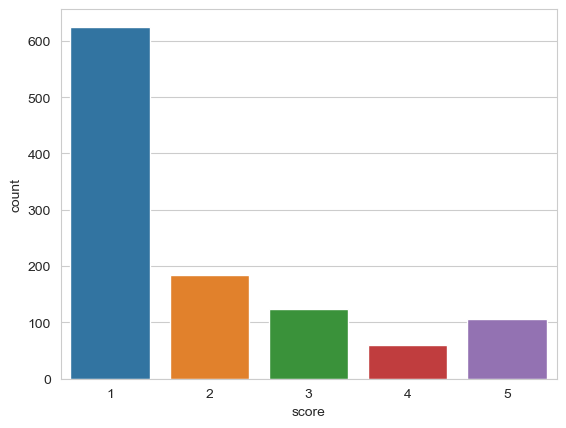

In [15]:
# visual chart berdasarkan score
sns.countplot(x='score', data=my_df);

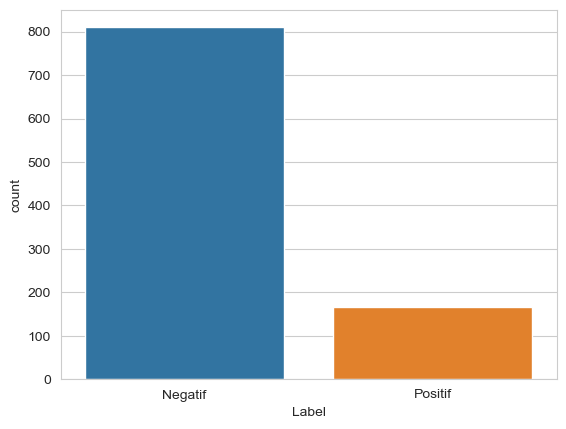

In [16]:
# visual chart berdasarkan label
sns.countplot(x='Label', data=my_df);

# Preprocessing/Cleaning
Proses dimana data diolah lalu dipilih data yang dianggap bisa dipakai.

## data cleaning

In [17]:
# membaca data yang tadi sudah di labeling
import pandas as pd
pd.set_option('display.max_columns', None)
my_df = pd.read_csv('dataset/data_ulasan_instagram.csv')
my_df.head(500)

,content,score,Label
0,"Ngga jelas bangettt, filter Ig malah pada bura...",1,Negatif
1,"Instagram saya tiba2 mati ini,harus muat ulang...",1,Negatif
2,"kualitas foto dan video di HP android jelek, t...",1,Negatif
3,Min akun gw ke hack gara² abis download apk un...,1,Negatif
4,Ada apa dengan Instagram. Filter buram dan tid...,1,Negatif
...,...,...,...
495,ig makin kesini makin gak jelas🙂 masa iya tiap...,1,Negatif
496,"Semenjak update makin banyak bug musik ga ada,...",1,Negatif
497,Instagram gimana sih udah di update kok gak bi...,1,Negatif
498,"Aku suka fitur efek kamera apalagi yang lucu""....",2,Negatif


In [18]:
# info() digunakan untuk menampilkan informasi detail tentang dataframe, 
# seperti jumlah baris data, nama-nama kolom berserta jumlah data dan tipe datanya, dan sebagainya.
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1100 non-null   object
 1   score    1100 non-null   int64 
 2   Label    976 non-null    object
dtypes: int64(1), object(2)
memory usage: 25.9+ KB


In [19]:
# Tampilkan setiap baris yang memiliki nilai null (NaN) pada kolom apapun
# Gunakan fitur isna() yang disediakan library pandas
my_df.isna()

,content,score,Label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1095,False,False,True
1096,False,False,False
1097,False,False,False
1098,False,False,False


In [20]:
# isna() digunakan untuk memeriksa apakah objek Dataframe atau Series berisi nilai yang hilang atau nol (NA, NaN)
my_df.isna().any()

content    False
score      False
Label       True
dtype: bool

In [21]:
# describe() digunakan untuk menampilkan statistik deskriptif dari Dataframe atau series
my_df.describe()

,score
count,1100.000000
mean,1.942727
std,1.328415
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,5.000000


In [22]:
# mencari jumlah baris data yang bernilai null
# terdapat kolom label memiliki nilai kosong
my_df.isnull().sum()  

content      0
score        0
Label      124
dtype: int64

## Handling Missing value-Ignore tuple
Handling missing values (penanganan nilai yang hilang) adalah proses mengatasi nilai-nilai yang hilang dalam dataset. Nilai yang hilang dapat muncul karena berbagai alasan, seperti ketidakhadiran data, kesalahan pengumpulan data, atau kegagalan sistem.

In [23]:
# dropna untuk menghapus nilai yang hilang dari Python DataFrame
my_df.dropna(subset=['Label'],inplace = True)

In [24]:
# Mengembalikan nilai Boolean yang menunjukkan apakah ekspresi tidak berisi data yang valid (null)
my_df.isnull().sum()

content    0
score      0
Label      0
dtype: int64

In [25]:
my_df.head(50)

,content,score,Label
0,"Ngga jelas bangettt, filter Ig malah pada bura...",1,Negatif
1,"Instagram saya tiba2 mati ini,harus muat ulang...",1,Negatif
2,"kualitas foto dan video di HP android jelek, t...",1,Negatif
3,Min akun gw ke hack gara² abis download apk un...,1,Negatif
4,Ada apa dengan Instagram. Filter buram dan tid...,1,Negatif
5,"kenapa sih gak bisa masuk dan tertulis ""halama...",1,Negatif
6,Di sec acc tiba2 ga bisa up feed foto banyakan...,1,Negatif
7,"Semkin di update smkin parah bug nya, yg filte...",1,Negatif
8,Instagram aplikasi tempat media sosial yg nyam...,5,Positif
9,"Aneh, masa saya mau post foto gabisa, fotonya ...",1,Negatif


In [26]:
# menyimpan hasil file data cleaning dengan nama data_cleaning.csv
my_df.to_csv("dataset/data_cleaning.csv", index = False)

## Text PreProcessing
Text preprocessing merupakan suatu proses pengubahan bentuk sebuah data menjadi lebih terstruktur sesuai dengan kebutuhannya dalam proses data mining dan biasanya akan menjadi nilai numerik.

In [27]:
# import library pandas
import pandas as pd

# membaca file yang sudah di cleaning dengan nama data_cleaning.csv
df = pd.read_csv('dataset/data_cleaning.csv')
df.head(50)

,content,score,Label
0,"Ngga jelas bangettt, filter Ig malah pada bura...",1,Negatif
1,"Instagram saya tiba2 mati ini,harus muat ulang...",1,Negatif
2,"kualitas foto dan video di HP android jelek, t...",1,Negatif
3,Min akun gw ke hack gara² abis download apk un...,1,Negatif
4,Ada apa dengan Instagram. Filter buram dan tid...,1,Negatif
5,"kenapa sih gak bisa masuk dan tertulis ""halama...",1,Negatif
6,Di sec acc tiba2 ga bisa up feed foto banyakan...,1,Negatif
7,"Semkin di update smkin parah bug nya, yg filte...",1,Negatif
8,Instagram aplikasi tempat media sosial yg nyam...,5,Positif
9,"Aneh, masa saya mau post foto gabisa, fotonya ...",1,Negatif


# Transformasi
transformasi data adalah untuk mengubah skala pengukuran data ke dalam bentuk lain supaya memenuhi asumsi analisis

## Case Folding
Proses case folding adalah proses mengubah seluruh huruf menjadi huruf kecil. Pada proses ini karakter-karakter 'A'-'Z' yang terdapat pada data diubah kedalam karakter 'a'-'z'.

In [28]:
# re/RegEx digunakan untuk mencocokkan, mencari, mengganti, dan memanipulasi teks berdasarkan pola tertentu.

import re
def  clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem)) 
    return my_df

In [29]:
my_df['text_clean'] = my_df['content'].str.lower()
my_df['text_clean']
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head(10)

,content,score,Label,text_clean
0,"Ngga jelas bangettt, filter Ig malah pada bura...",1,Negatif,ngga jelas bangettt filter ig malah pada buram...
1,"Instagram saya tiba2 mati ini,harus muat ulang...",1,Negatif,instagram saya tiba mati iniharus muat ulang t...
2,"kualitas foto dan video di HP android jelek, t...",1,Negatif,kualitas foto dan video di hp android jelek to...
3,Min akun gw ke hack gara² abis download apk un...,1,Negatif,min akun gw ke hack gara abis download apk unf...
4,Ada apa dengan Instagram. Filter buram dan tid...,1,Negatif,ada apa dengan instagram filter buram dan tida...
5,"kenapa sih gak bisa masuk dan tertulis ""halama...",1,Negatif,kenapa sih gak bisa masuk dan tertulis halaman...
6,Di sec acc tiba2 ga bisa up feed foto banyakan...,1,Negatif,di sec acc tiba ga bisa up feed foto banyakan ...
7,"Semkin di update smkin parah bug nya, yg filte...",1,Negatif,semkin di update smkin parah bug nya yg filter...
8,Instagram aplikasi tempat media sosial yg nyam...,5,Positif,instagram aplikasi tempat media sosial yg nyam...
9,"Aneh, masa saya mau post foto gabisa, fotonya ...",1,Negatif,aneh masa saya mau post foto gabisa fotonya ja...


## Stopword Removal
Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll. Makna di balik penggunaan stopword yaitu dengan menghapus kata-kata yang memiliki informasi rendah dari sebuah teks, kita dapat fokus pada kata-kata penting sebagai gantinya.

In [30]:
# NLTK berfungsi untuk pengolahan data bahasa manusia.
# Korpus NLTK adalah kumpulan besar semua jenis kumpulan data bahasa alami.

import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
data_clean['text_StopWord'] = data_clean['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head(50)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,score,Label,text_clean,text_StopWord
0,"Ngga jelas bangettt, filter Ig malah pada bura...",1,Negatif,ngga jelas bangettt filter ig malah pada buram...,ngga bangettt filter ig buram udah coba perbar...
1,"Instagram saya tiba2 mati ini,harus muat ulang...",1,Negatif,instagram saya tiba mati iniharus muat ulang t...,instagram mati iniharus muat ulang teruss aman...
2,"kualitas foto dan video di HP android jelek, t...",1,Negatif,kualitas foto dan video di hp android jelek to...,kualitas foto video hp android jelek tolong di...
3,Min akun gw ke hack gara² abis download apk un...,1,Negatif,min akun gw ke hack gara abis download apk unf...,min akun gw hack gara abis download apk unfoll...
4,Ada apa dengan Instagram. Filter buram dan tid...,1,Negatif,ada apa dengan instagram filter buram dan tida...,instagram filter buram tolong perbaiki kesemul...
5,"kenapa sih gak bisa masuk dan tertulis ""halama...",1,Negatif,kenapa sih gak bisa masuk dan tertulis halaman...,sih gak masuk tertulis halaman tersedia kesala...
6,Di sec acc tiba2 ga bisa up feed foto banyakan...,1,Negatif,di sec acc tiba ga bisa up feed foto banyakan ...,sec acc ga up feed foto banyakan pake lagu nge...
7,"Semkin di update smkin parah bug nya, yg filte...",1,Negatif,semkin di update smkin parah bug nya yg filter...,semkin update smkin parah bug nya yg filter jd...
8,Instagram aplikasi tempat media sosial yg nyam...,5,Positif,instagram aplikasi tempat media sosial yg nyam...,instagram aplikasi media sosial yg nyaman kere...
9,"Aneh, masa saya mau post foto gabisa, fotonya ...",1,Negatif,aneh masa saya mau post foto gabisa fotonya ja...,aneh post foto gabisa fotonya blur gitu gilira...


## Tokenizing
Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token. Didalam NLP, token diartikan sebagai “kata” meskipun tokenize juga dapat dilakukan pada paragraf maupun kalimat

In [31]:
# NLTK berfungsi untuk pengolahan data bahasa manusia.
# nltk.tokensize berfungsi untuk menghasilkan token-span, direpresentasikan sebagai tupel bilangan bulat 
# yang memiliki semantik yang sama dengan irisan string, untuk mendukung perbandingan tokenizer yang efisien.

import nltk 
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_StopWord'].apply(lambda x: word_tokenize(x))
data_clean.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,content,score,Label,text_clean,text_StopWord,text_tokens
0,"Ngga jelas bangettt, filter Ig malah pada bura...",1,Negatif,ngga jelas bangettt filter ig malah pada buram...,ngga bangettt filter ig buram udah coba perbar...,"[ngga, bangettt, filter, ig, buram, udah, coba..."
1,"Instagram saya tiba2 mati ini,harus muat ulang...",1,Negatif,instagram saya tiba mati iniharus muat ulang t...,instagram mati iniharus muat ulang teruss aman...,"[instagram, mati, iniharus, muat, ulang, terus..."
2,"kualitas foto dan video di HP android jelek, t...",1,Negatif,kualitas foto dan video di hp android jelek to...,kualitas foto video hp android jelek tolong di...,"[kualitas, foto, video, hp, android, jelek, to..."
3,Min akun gw ke hack gara² abis download apk un...,1,Negatif,min akun gw ke hack gara abis download apk unf...,min akun gw hack gara abis download apk unfoll...,"[min, akun, gw, hack, gara, abis, download, ap..."
4,Ada apa dengan Instagram. Filter buram dan tid...,1,Negatif,ada apa dengan instagram filter buram dan tida...,instagram filter buram tolong perbaiki kesemul...,"[instagram, filter, buram, tolong, perbaiki, k..."


## Stemming
Stemming adalah proses pemetaan dan penguraian bentuk dari suatu kata menjadi bentuk kata dasarnya. Untuk melakukan stemming bahasa Indonesia kita dapat menggunakan library Python Sastrawi yang sudah kita siapkan di awal. Library Sastrawi menerapkan Algoritma Nazief dan Adriani dalam melakukan stemming bahasa Indonesia.

In [32]:
# library sastrawi adalah sebuah modul sederhana yang dimiliki oleh library python yang memungkinkan untuk melakukan 
# pengurang kata-kata yang ter- infleksi dalam bahasa Indonesia ke bentuk baku-nya atau sesuai dengan standar kamus.

!pip install Sastrawi

In [33]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [34]:
# Proses ini mengubah kata menjadi kata dasarnya dengan menghilangkan imbuhan-imbuhan pada kata dalam 
# dokumen atau mengubah kata kerja menjadi kata benda.
# Misalnya kata "perancangan" dan "merancang" akan diubah menjadi sebuah kata yang sama, yaitu "rancang"

#-----------------STEMMING -----------------
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]


#script ini bisa dipisah dari eksekusinya setelah pembacaaan term selesai
data_clean['text_steamindo'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head(20)

3440
------------------------
1 : ngga : ngga
2 : bangettt : bangettt
3 : filter : filter
4 : ig : ig
5 : buram : buram
6 : udah : udah
7 : coba : coba
8 : perbarui : baru
9 : uninstall : uninstall
10 : aplikasi : aplikasi
11 : trs : trs
12 : instal : instal
13 : ttep : ttep
14 : aja : aja
15 : kaya : kaya
16 : gitu : gitu
17 : tolong : tolong
18 : diperbaiki : baik
19 : instagram : instagram
20 : mati : mati
21 : iniharus : iniharus
22 : muat : muat
23 : ulang : ulang
24 : teruss : teruss
25 : aman : aman
26 : pusat : pusat
27 : mematikan : mati
28 : yatolong : yatolong
29 : balasan : balas
30 : kualitas : kualitas
31 : foto : foto
32 : video : video
33 : hp : hp
34 : android : android
35 : jelek : jelek
36 : ditambah : tambah
37 : fitur : fitur
38 : timer : timer
39 : kamera : kamera
40 : lumayan : lumayan
41 : min : min
42 : akun : akun
43 : gw : gw
44 : hack : hack
45 : gara : gara
46 : abis : abis
47 : download : download
48 : apk : apk
49 : unfolllwers : unfolllwers
50 : pw : pw


392 : apknya : apknya
393 : pngn : pngn
394 : ad : ad
395 : musicnya : musicnya
396 : galeri : galeri
397 : suaranyatapi : suaranyatapi
398 : memuaskan : muas
399 : laptop : laptop
400 : grup : grup
401 : buruk : buruk
402 : kendalanya : kendala
403 : posting : posting
404 : gambar : gambar
405 : prosesnya : proses
406 : jaringannya : jaring
407 : lancar : lancar
408 : asyik : asyik
409 : bermasalah : masalah
410 : dicoba : coba
411 : karuan : karuan
412 : bintang : bintang
413 : cerita : cerita
414 : lagunya : lagu
415 : kembalikan : kembali
416 : habis : habis
417 : d : d
418 : notif : notif
419 : huruf : huruf
420 : bold : bold
421 : salah : salah
422 : star : star
423 : aj : aj
424 : to : to
425 : admin : admin
426 : anehnya : aneh
427 : blurnya : blurnya
428 : wktu : wktu
429 : dr : dr
430 : hpku : hpku
431 : cuman : cuman
432 : kejelasannya : jelas
433 : mmg : mmg
434 : error : error
435 : sananya : sana
436 : trmksh : trmksh
437 : konfirmasi : konfirmasi
438 : wajah : wajah
439 

768 : soalny : soalny
769 : perduli : duli
770 : knpa : knpa
771 : burem : burem
772 : gituch : gituch
773 : perangkat : perangkat
774 : sementaravperangkat : sementaravperangkat
775 : disamakan : sama
776 : topik : topik
777 : y : y
778 : scrolling : scrolling
779 : topiknya : topik
780 : random : random
781 : sukai : suka
782 : berguna : guna
783 : bertambahnya : tambah
784 : apalgi : apalgi
785 : perbaruan : baru
786 : sesuai : sesuai
787 : pad : pad
788 : suaranya : suara
789 : kotor : kotor
790 : ehh : ehh
791 : dri : dri
792 : nih : nih
793 : yahtolong : yahtolong
794 : minsayaa : minsayaa
795 : terpotong : potong
796 : pembayarannya : bayar
797 : didashboard : didashboard
798 : progressnya : progressnya
799 : please : please
800 : help : help
801 : support : support
802 : ngutak : ngutak
803 : ngatiknyatidak : ngatiknyatidak
804 : showstatusnya : showstatusnya
805 : anjas : anjas
806 : warto : warto
807 : sudh : sudh
808 : k : k
809 : via : via
810 : gopay : gopay
811 : mantep :

1118 : mengurangi : kurang
1119 : frekuensi : frekuensi
1120 : pinjaman : pinjam
1121 : online : online
1122 : sajatau : sajatau
1123 : beda : beda
1124 : dulusekarang : dulusekarang
1125 : storyloading : storyloading
1126 : teruuuus : teruuuus
1127 : jaya : jaya
1128 : slalu : slalu
1129 : ngeblurgtu : ngeblurgtu
1130 : bagusaja : bagusaja
1131 : dh : dh
1132 : kmaren : kmaren
1133 : bgus : bgus
1134 : hrus : hrus
1135 : unins : unins
1136 : sma : sma
1137 : seumur : umur
1138 : umur : umur
1139 : fotovideo : fotovideo
1140 : kesave : kesave
1141 : kegaleri : galeri
1142 : oktober : oktober
1143 : welcom : welcom
1144 : aduh : aduh
1145 : gusti : gusti
1146 : ganggu : ganggu
1147 : makiin : makiin
1148 : boro : boro
1149 : melorot : lorot
1150 : terimakasihh : terimakasihh
1151 : gmn : gmn
1152 : bs : bs
1153 : diputar : putar
1154 : dikirim : kirim
1155 : dilihatt : dilihatt
1156 : mencari : cari
1157 : barat : barat
1158 : band : band
1159 : doangpadahal : doangpadahal
1160 : lengka

1459 : seringkali : seringkali
1460 : berhenti : henti
1461 : berjalan : jalan
1462 : stak : stak
1463 : nengok : nengok
1464 : seolaholah : seolaholah
1465 : hadeuhh : hadeuhh
1466 : bingungsaat : bingungsaat
1467 : lagusetelah : lagusetelah
1468 : hilangtapi : hilangtapi
1469 : itugimana : itugimana
1470 : detect : detect
1471 : munculnya : muncul
1472 : menemukan : temu
1473 : hak : hak
1474 : camera : camera
1475 : mukanya : muka
1476 : buronantolong : buronantolong
1477 : minati : minat
1478 : dimasukan : masuk
1479 : kedalam : dalam
1480 : daftar : daftar
1481 : ginimasa : ginimasa
1482 : digalery : digalery
1483 : dibukak : dibukak
1484 : samasekali : samasekali
1485 : adaemngnya : adaemngnya
1486 : kah : kah
1487 : force : force
1488 : closed : closed
1489 : menerus : terus
1490 : ngaruh : ngaruh
1491 : menurun : turun
1492 : gabung : gabung
1493 : nth : nth
1494 : fto : fto
1495 : keveqa : keveqa
1496 : hariuu : hariuu
1497 : lagiii : lagiii
1498 : nyamannnn : nyamannnn
1499 :

1803 : nambahi : nambahi
1804 : ditemuin : ditemuin
1805 : diperbaik : baik
1806 : kyak : kyak
1807 : penyanyi : nyanyi
1808 : pelayanannya : layan
1809 : notes : notes
1810 : digunain : digunain
1811 : diaccount : diaccount
1812 : videofoto : videofoto
1813 : gx : gx
1814 : galerisih : galerisih
1815 : kk : kk
1816 : menguras : uras
1817 : kuota : kuota
1818 : perbaikifoto : perbaikifoto
1819 : rusakk : rusakk
1820 : nie : nie
1821 : pakee : pakee
1822 : solusianya : solusianya
1823 : lakukan : laku
1824 : perjelas : jelas
1825 : pencipta : cipta
1826 : updatenya : updatenya
1827 : follow : follow
1828 : kepoto : kepoto
1829 : sarankan : saran
1830 : namanya : nama
1831 : sedikitpum : sedikitpum
1832 : peningkatannya : tingkat
1833 : mengubah : ubah
1834 : pemakaian : pakai
1835 : banyakin : banyakin
1836 : iniknp : iniknp
1837 : adatolong : adatolong
1838 : buruan : buru
1839 : perbaikihabis : perbaikihabis
1840 : bobrok : bobrok
1841 : aktifin : aktifin
1842 : lgsg : lgsg
1843 : rib

2148 : tolonggggg : tolonggggg
2149 : mengupload : mengupload
2150 : pop : pop
2151 : instagramnya : instagramnya
2152 : nyimpennya : nyimpennya
2153 : lagumusik : lagumusik
2154 : hits : hits
2155 : negara : negara
2156 : perizinan : izin
2157 : lisensi : lisensi
2158 : terkait : kait
2159 : kecwa : kecwa
2160 : gbisa : gbisa
2161 : memori : memori
2162 : ss : ss
2163 : dlupadahal : dlupadahal
2164 : wkwk : wkwk
2165 : tukidannya : tukidannya
2166 : switch : switch
2167 : berjam : jam
2168 : wkwkwk : wkwkwk
2169 : utak : utak
2170 : atik : atik
2171 : pulihkan : pulih
2172 : mengakses : akses
2173 : menggunakannya : guna
2174 : keperluan : perlu
2175 : instatorysaat : instatorysaat
2176 : pencarianyg : pencarianyg
2177 : temukanserta : temukanserta
2178 : original : original
2179 : bersuara : suara
2180 : galerialbum : galerialbum
2181 : tekan : tekan
2182 : dehhh : dehhh
2183 : percepat : cepat
2184 : kecewastlh : kecewastlh
2185 : galeripdhl : galeripdhl
2186 : bnykkuota : bnykkuota

2481 : menyamaratakan : menyamaratakan
2482 : memboosting : memboosting
2483 : terjadwal : jadwal
2484 : hadeh : hadeh
2485 : gabisaaa : gabisaaa
2486 : gajelasss : gajelasss
2487 : sprti : sprti
2488 : yp : yp
2489 : close : close
2490 : early : early
2491 : warning : warning
2492 : ijo : ijo
2493 : ngeglitch : ngeglitch
2494 : taruh : taruh
2495 : linknya : linknya
2496 : mengirim : kirim
2497 : bertabrakan : tabrak
2498 : arsipan : arsip
2499 : naikin : naikin
2500 : ksih : ksih
2501 : hindi : hindi
2502 : kreator : kreator
2503 : mimin : mimin
2504 : gabisaa : gabisaa
2505 : tuan : tuan
2506 : berkat : berkat
2507 : mu : mu
2508 : daki : daki
2509 : melekat : lekat
2510 : ngeselinnnn : ngeselinnnn
2511 : third : third
2512 : cepetan : cepetan
2513 : kotak : kotak
2514 : pending : pending
2515 : pemberitahuannya : pemberitahuannya
2516 : sistemnya : sistem
2517 : alasannya : alas
2518 : pedoman : pedoman
2519 : kecewq : kecewq
2520 : igs : igs
2521 : kl : kl
2522 : mw : mw
2523 : kt

2808 : krna : krna
2809 : memunculkan : muncul
2810 : instagramtolong : instagramtolong
2811 : ukuran : ukur
2812 : hidupkan : hidup
2813 : slot : slot
2814 : diseleksi : seleksi
2815 : mengindikasikan : indikasi
2816 : penipuan : tipu
2817 : rells : rells
2818 : samsung : samsung
2819 : flip : flip
2820 : kalean : kalean
2821 : cook : cook
2822 : kagak : kagak
2823 : yakkkk : yakkkk
2824 : ti : ti
2825 : dulunya : dulunya
2826 : kalangan : kalang
2827 : remaja : remaja
2828 : happy : happy
2829 : nonaktifkan : nonaktif
2830 : menipu : tipu
2831 : peninjauannya : tinjau
2832 : gituan : gituan
2833 : buggg : buggg
2834 : mengganggucontohnyasorotan : mengganggucontohnyasorotan
2835 : munculya : munculya
2836 : sinyall : sinyall
2837 : bagussnama : bagussnama
2838 : berubahhhkadang : berubahhhkadang
2839 : muncullsaat : muncullsaat
2840 : adadan : adad
2841 : nyaatolong : nyaatolong
2842 : bugg : bugg
2843 : mengangguuu : mengangguuu
2844 : mengekspresikan : ekspresi
2845 : ngebosenin : n

3140 : dipostingan : dipostingan
3141 : highlightkarenasaya : highlightkarenasaya
3142 : motivasi : motivasi
3143 : mengembangkan : kembang
3144 : lamaaa : lamaaa
3145 : isii : isi
3146 : jual : jual
3147 : semulakalau : semulakalau
3148 : dibeli : beli
3149 : centangnya : centang
3150 : special : special
3151 : terkesan : kes
3152 : followersnya : followersnya
3153 : aslibukan : aslibukan
3154 : belitolong : belitolong
3155 : dulukalau : dulukalau
3156 : igmending : igmending
3157 : bangsad : bangsad
3158 : a : a
3159 : pededoman : pededoman
3160 : tetapkan : tetap
3161 : setelahnya : telah
3162 : bngsd : bngsd
3163 : harifoto : harifoto
3164 : kesimpenpadahal : kesimpenpadahal
3165 : skip : skip
3166 : kejeda : jeda
3167 : bukann : bukann
3168 : huuh : huuh
3169 : syukaa : syukaa
3170 : inspirasi : inspirasi
3171 : dkk : dkk
3172 : frezee : frezee
3173 : sponsor : sponsor
3174 : draf : draf
3175 : belok : belok
3176 : hri : hri
3177 : keluarkan : keluar
3178 : malh : malh
3179 : mili

,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,"Ngga jelas bangettt, filter Ig malah pada bura...",1,Negatif,ngga jelas bangettt filter ig malah pada buram...,ngga bangettt filter ig buram udah coba perbar...,"[ngga, bangettt, filter, ig, buram, udah, coba...",ngga bangettt filter ig buram udah coba baru u...
1,"Instagram saya tiba2 mati ini,harus muat ulang...",1,Negatif,instagram saya tiba mati iniharus muat ulang t...,instagram mati iniharus muat ulang teruss aman...,"[instagram, mati, iniharus, muat, ulang, terus...",instagram mati iniharus muat ulang teruss aman...
2,"kualitas foto dan video di HP android jelek, t...",1,Negatif,kualitas foto dan video di hp android jelek to...,kualitas foto video hp android jelek tolong di...,"[kualitas, foto, video, hp, android, jelek, to...",kualitas foto video hp android jelek tolong ba...
3,Min akun gw ke hack gara² abis download apk un...,1,Negatif,min akun gw ke hack gara abis download apk unf...,min akun gw hack gara abis download apk unfoll...,"[min, akun, gw, hack, gara, abis, download, ap...",min akun gw hack gara abis download apk unfoll...
4,Ada apa dengan Instagram. Filter buram dan tid...,1,Negatif,ada apa dengan instagram filter buram dan tida...,instagram filter buram tolong perbaiki kesemul...,"[instagram, filter, buram, tolong, perbaiki, k...",instagram filter buram tolong baik mula instagram
5,"kenapa sih gak bisa masuk dan tertulis ""halama...",1,Negatif,kenapa sih gak bisa masuk dan tertulis halaman...,sih gak masuk tertulis halaman tersedia kesala...,"[sih, gak, masuk, tertulis, halaman, tersedia,...",sih gak masuk tulis halaman sedia salah teknis...
6,Di sec acc tiba2 ga bisa up feed foto banyakan...,1,Negatif,di sec acc tiba ga bisa up feed foto banyakan ...,sec acc ga up feed foto banyakan pake lagu nge...,"[sec, acc, ga, up, feed, foto, banyakan, pake,...",sec acc ga up feed foto banyak pake lagu ngebu...
7,"Semkin di update smkin parah bug nya, yg filte...",1,Negatif,semkin di update smkin parah bug nya yg filter...,semkin update smkin parah bug nya yg filter jd...,"[semkin, update, smkin, parah, bug, nya, yg, f...",semkin update smkin parah bug nya yg filter jd...
8,Instagram aplikasi tempat media sosial yg nyam...,5,Positif,instagram aplikasi tempat media sosial yg nyam...,instagram aplikasi media sosial yg nyaman kere...,"[instagram, aplikasi, media, sosial, yg, nyama...",instagram aplikasi media sosial yg nyaman kere...
9,"Aneh, masa saya mau post foto gabisa, fotonya ...",1,Negatif,aneh masa saya mau post foto gabisa fotonya ja...,aneh post foto gabisa fotonya blur gitu gilira...,"[aneh, post, foto, gabisa, fotonya, blur, gitu...",aneh post foto gabisa foto blur gitu gilir pak...


In [35]:
# simpan hasil text preprocessing ke file csv

data_clean.to_csv('dataset/hasil_TextPreProcessing_instagram.csv', index= False)

In [36]:
# import library re, kemudian lakukan praproses
# library Regular Expressions (RegEx) digunakan untuk mencocokkan, mencari, mengganti, 
# dan memanipulasi teks berdasarkan pola tertentu.

import re
def praproses(text):
    text = re.sub('<[^>]*>', '', text) # re.sub berfungsi mengganti teks
    emoticons = re.findall('(?::|;|=)()(?:-)?(?:\)|\(|D|P)', text) # re.findal berfungsi mengembalikan daftar semua kemunculan pola dalam teks
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

# Data Mining
Proses dimana dilakukan beragam teknik untuk mengekstrak pola-pola potensial menghasilkan data yang berguna.

## spliting data
memecah data test 20% dari keseluruhan data

In [37]:
# membagi data menjadi data training dan testing dengan test_size = 0.20 dan random state nya 0

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean['content'], data_clean['Label'], 
                                                    test_size = 0.20, 
                                                    random_state = 0)

## pembobotan tf-idf
menentukan nilai frekuensi sebuah kata di dalam sebuah dokumen atau artikel dan juga frekuensi di dalam banyak dokumen. Perhitungan ini menentukan seberapa relevan sebuah kata di dalam sebuah dokumen

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(780,)
(780,)
(196,)
(196,)


In [40]:
# fungsi dari module sklearn adalah membantu melakukan processing data ataupun melakukan training data 
# untuk kebutuhan machine learning atau data science.

from sklearn.feature_extraction.text import CountVectorizer

# fungsi dari CountVectorizer menghitung jumlah frekuensi sehubungan dengan indeks kosakata 
# dimana sebagai tf-idf pertimbangkan keseluruhan dokumen bobot kata.

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [41]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [42]:
# fungsi dari module sklearn adalah membantu melakukan processing data ataupun melakukan training data 
# untuk kebutuhan machine learning atau data science.

from sklearn.naive_bayes import MultinomialNB

# fungsi dari naive_bayes pada sklearn memproses pengklasifikasian teks dengan menggunakan nilai 
# probabilitas suatu kelas dalam suatu dokumen.

nb = MultinomialNB()
nb.fit(tfidf_train, y_train)

MultinomialNB()

In [43]:
# mengubah data training ke bentuk array
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
y_pred = nb.predict(tfidf_test)

In [45]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

# Evaluation
memberikan hasil akhir yaitu confusion matrix, Accuracy, Precision, Recall dan f1_score.

## Confusion Matrix
metode yang digunakan untuk melakukan perhitungan akurasi pada konsep data mining.

In [58]:
# import library confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
predicted = clf.predict(X_test)

print(f'Hasil Laporan confusion matrix Algoritme naive bayes:\n {confusion_matrix(y_test, predicted)}')

Hasil Laporan confusion matrix Algoritme naive bayes:
 [[159   4]
 [ 20  13]]


In [57]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
print('Hasil Laporan Klasifikasi naïve bayes:')
print("\nMultinomialNB Accuracy:", accuracy_score(y_test,predicted))
print("MultinomialNB Precision:", precision_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB Recall:", recall_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB f1_score:", f1_score(y_test,predicted, average="binary", pos_label="Negatif"))

print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

# Load dataset
data_clean = pd.read_csv('dataset/hasil_TextPreProcessing_instagram.csv')

Hasil Laporan Klasifikasi naïve bayes:

MultinomialNB Accuracy: 0.8775510204081632
MultinomialNB Precision: 0.888268156424581
MultinomialNB Recall: 0.9754601226993865
MultinomialNB f1_score: 0.9298245614035088

              precision    recall  f1-score   support

     Negatif       0.89      0.98      0.93       163
     Positif       0.76      0.39      0.52        33

    accuracy                           0.88       196
   macro avg       0.83      0.68      0.72       196
weighted avg       0.87      0.88      0.86       196

